<h1><center> Arrival Time Visualization <br><br> 
<center> Differential Privacy Application<br><br> 
Wendy Shi</center></center>

# TOC

- [Pii](#P_ii)
- [Pij](#Pij-visualization,-box-plot)
- [Number of links being zeros](#Count-the-total-number-of-zeros)

# Preparation

In [1]:
#Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import scipy.stats as stats
import statistics

# Original weight matrix

In [4]:
Ori_mt = pd.read_csv("IL_Data/Aggregate/IL_ori_agg.csv")
Ori_mt = Ori_mt.drop(columns = 'Unnamed: 0')

P5_mt = pd.read_csv("IL_Data/Aggregate/IL_P5_agg.csv")
P5_mt = P5_mt.drop(columns = 'Unnamed: 0')

P1_mt = pd.read_csv("IL_Data/Aggregate/IL_P1_agg.csv")
P1_mt = P1_mt.drop(columns = 'Unnamed: 0')

P05_mt = pd.read_csv("IL_Data/Aggregate/IL_P05_agg.csv")
P05_mt = P05_mt.drop(columns = 'Unnamed: 0')

P01_mt = pd.read_csv("IL_Data/Aggregate/IL_P01_agg.csv")
P01_mt = P01_mt.drop(columns = 'Unnamed: 0')

P005_mt = pd.read_csv("IL_Data/Aggregate/IL_P005_agg.csv")
P005_mt = P005_mt.drop(columns = 'Unnamed: 0')

In [5]:
P01_mt.head(3)

,17001,17005,17007,17011,17015,17017,17019,17021,17023,17025,...,17185,17187,17189,17191,17193,17195,17197,17199,17201,17203
0,0.601417,0.000000,0.000000,0.004102,0.000000,0.004134,0.005038,0.003736,0.0,0.002433,...,0.0,0.000000,0.000000,0.002778,0.000000,0.003251,0.002648,0.005243,0.010044,0.005544
1,0.000000,0.251498,0.001117,0.006652,0.000000,0.010663,0.028029,0.000000,0.0,0.003910,...,0.0,0.001980,0.002539,0.000305,0.004113,0.000000,0.018229,0.020920,0.000000,0.002945
2,0.000220,0.027279,0.288842,0.000000,0.008914,0.000000,0.010113,0.000000,0.0,0.024565,...,0.0,0.001956,0.000083,0.000000,0.008170,0.000000,0.000000,0.000000,0.116212,0.000000


In [7]:
Original_np = Ori_mt.to_numpy()
P5_np = P5_mt.to_numpy()
P1_np = P1_mt.to_numpy()
P05_np = P05_mt.to_numpy()
P01_np = P01_mt.to_numpy()
P005_np = P005_mt.to_numpy()

# P_ii

In [9]:
ori_list = [Original_np[i][i] for i in range(86)]
P5_list = [P5_np[i][i] for i in range(86)]
P1_list = [P1_np[i][i] for i in range(86)]
P05_list = [P05_np[i][i] for i in range(86)]
P01_list = [P01_np[i][i] for i in range(86)]
P005_list = [P005_np[i][i] for i in range(86)]

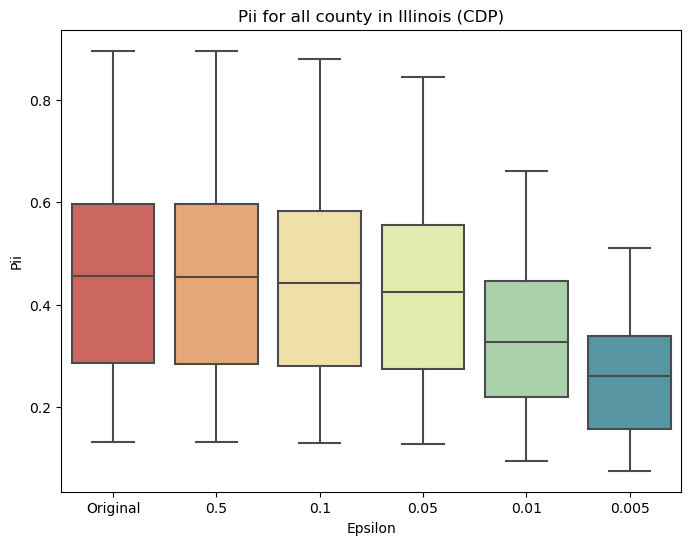

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
data = [ori_list, P5_list, P1_list, P05_list, P01_list, P005_list]

color = sns.color_palette("Spectral", n_colors=6)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette=color, saturation=0.7, showfliers=False)

# Adding labels and title
plt.xticks([0, 1, 2, 3, 4, 5], ['Original', '0.5', '0.1', '0.05', '0.01','0.005'])
plt.title("Pii for all county in Illinois (CDP)")
plt.ylabel("Pii")
plt.xlabel("Epsilon")

# Save plot
plt.savefig("Pii_staying_agg_IL.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


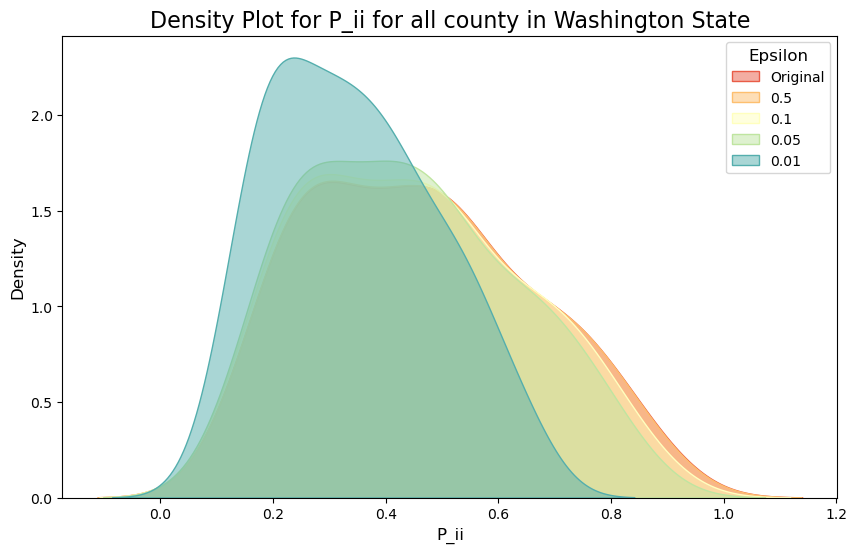

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
#data = [ori_list, P5_list, P1_list, P05_list, P01_list, P005_list, P001_list]
data = [ori_list, P5_list, P1_list, P05_list, P01_list]
labels = ['Original', '0.5', '0.1', '0.05', '0.01']

# Generate a color palette
color = sns.color_palette("Spectral", n_colors=5)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Loop through datasets to plot their density
for i, dataset in enumerate(data):
    sns.kdeplot(dataset, label=labels[i], color=color[i], fill=True, alpha=0.5)

# Adding labels and title
plt.title("Density Plot for P_ii for all county in Washington State", fontsize=16)
plt.xlabel("P_ii", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Adding a legend
plt.legend(title="Epsilon", fontsize=10, title_fontsize=12)

# Save plot (optional)
#plt.savefig("Pii_Density_Plot_all_agg.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Pij visualization, box plot

In [15]:
import math

In [18]:
def outflow_wt(matrix):
    
    '''
    This function defines mean out flow rate by county
    '''
    
    P_ij_list = []
    
    for i in range(86):
        #all outflow weight list every county
        working_list = []
        for j in range(86):
            if i != j:
                working_list.append(matrix[i][j])
                
        average =np.mean(working_list)        
        P_ij_list.append(average)
        
    return(P_ij_list)

In [19]:
def outflow_wt_all(matrix):
    
    '''
    
    This function defines all outflow rate
    
    '''
    
    P_ij = []
    
    for i in range(86):
        for j in range(86):
            if i != j:
                P_ij.append(matrix[i][j])
                
    return(P_ij)

In [20]:
def out_stat(data):
    
    series = pd.Series(data)
    
    #This print summary statistics
    minimum = series.min()
    point25 = series.quantile(0.25)
    median = series.median()
    point75 = series.quantile(0.75)
    maximum = series.max()
     
    #This print the summary statistcis    
    out_list = [minimum, point25, median, point75, maximum]
    print(out_list)
    
    #This only takes the first 75% of the data
    plotting_data = [i for i in data if i < point75]
    
    return(plotting_data)

In [21]:
import math

In [22]:
out_ori = outflow_wt_all(Original_np)
print(len(out_ori))
#ori_75 = out_stat(out_ori)

7310


In [23]:
log_ori = [math.log(x) for x in out_ori if x != 0]
print(len(log_ori))

5273


In [24]:
out_P5 = outflow_wt_all(P5_np)
log_P5 = [math.log(x) for x in out_P5 if x != 0]
print(len(log_P5))

5653


In [25]:
out_P1 = outflow_wt_all(P1_np)
log_P1 = [math.log(x) for x in out_P1 if x != 0]
print(len(log_P1))

5230


In [26]:
out_P05 = outflow_wt_all(P05_np)
log_P05 = [math.log(x) for x in out_P05 if x != 0]
print(len(log_P05))

4904


In [27]:
out_P01 = outflow_wt_all(P01_np)
log_P01 = [math.log(x) for x in out_P01 if x != 0]
print(len(log_P01))

4313


In [28]:
out_P005 = outflow_wt_all(P005_np)
log_P005 = [math.log(x) for x in out_P005 if x != 0]
print(len(log_P005))

4158


In [30]:
#out_P001 = outflow_wt_all(P001_np)
#log_P001 = [math.log(x) for x in out_P001 if x != 0]
#print(len(log_P001))

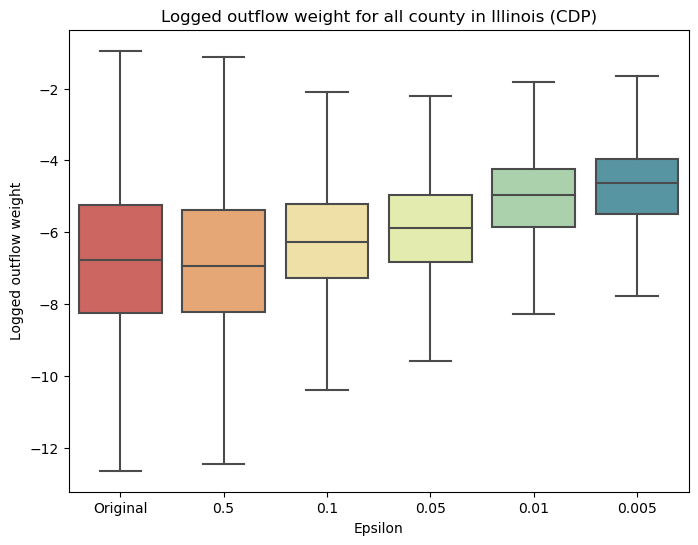

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combining data into a list of lists
data = [log_ori, log_P5, log_P1, log_P05, log_P01, log_P005]

color = sns.color_palette("Spectral", n_colors=6)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette=color, saturation=0.7, showfliers=False)

# Adding labels and title
plt.xticks([0, 1, 2, 3, 4, 5], 
           ['Original', '0.5','0.1','0.05','0.01', '0.005'])

plt.title("Logged outflow weight for all county in Illinois (CDP)")
plt.ylabel("Logged outflow weight")
plt.xlabel("Epsilon")

# Save plot
plt.savefig("Pij_outflow_logged_no_outlier_IL_agg.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# Count the total number of zeros

In [36]:
#outflow zero
def outflow_zero(matrix):
    P_ij_zero = []
    
    for i in range(86):
        #all outflow weight list every county
        working_list = []
        for j in range(86):
            if i != j and matrix[i][j] == 0:
                P_ij_zero.append((i,j))
    
    return(P_ij_zero)

In [37]:
total_links = 86*86

In [38]:
zero_ori = outflow_zero(Original_np)
len(zero_ori)

2037

In [39]:
zero_P5 = outflow_zero(P5_np)
len(zero_P5)

1657

In [40]:
zero_P1 = outflow_zero(P1_np)
len(zero_P1)

2080

In [41]:
zero_P05 = outflow_zero(P05_np)
len(zero_P05)

2406

In [42]:
zero_P01 = outflow_zero(P01_np)
len(zero_P01)

2997

In [43]:
zero_P005 = outflow_zero(P005_np)
len(zero_P005)

3152

In [45]:
#zero_P001 = outflow_zero(P001_np)
#len(zero_P001)

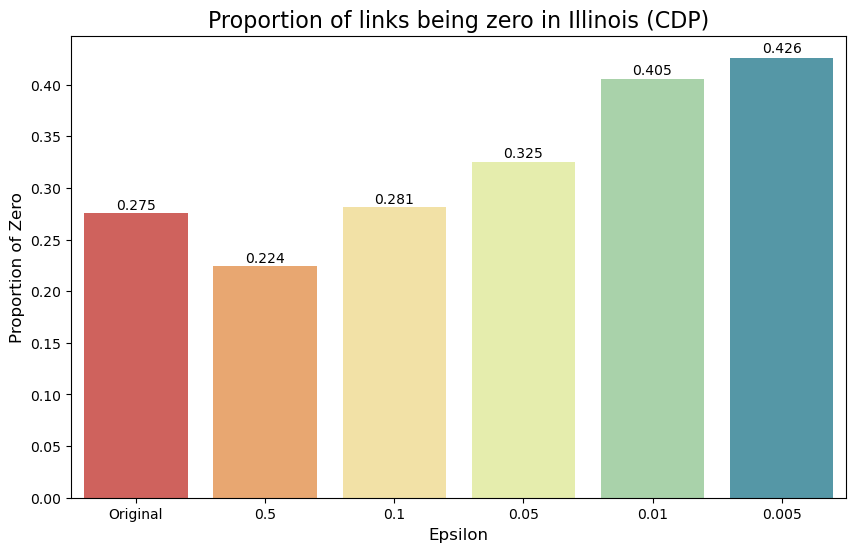

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = [len(zero_ori)/total_links, 
        len(zero_P5)/total_links, 
        len(zero_P1)/total_links, 
        len(zero_P05)/total_links, 
        len(zero_P01)/total_links,
       len(zero_P005)/total_links,
       ]
labels = ['Original', '0.5', '0.1', '0.05', '0.01', '0.005']

# Generate a color palette
color = sns.color_palette("Spectral", n_colors= 6)

# Create a DataFrame for easier handling
df = pd.DataFrame({'Epsilon': labels, 'Number of Zero': data})

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Epsilon', y='Number of Zero', palette=color, data=df)

# Adding labels and title
plt.title("Proportion of links being zero in Illinois (CDP)", fontsize=16)
plt.xlabel("Epsilon", fontsize=12)
plt.ylabel("Proportion of Zero", fontsize=12)

# Add data labels on each bar
for i, bar in enumerate(barplot.patches):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar_height*1.005,  # y-coordinate slightly above the bar
        f'{bar_height:.3f}',  # Data label
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Save plot (optional)
plt.savefig("Proportion_of_Zero_agg_IL.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
